<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,SelectFpr,f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
df =  pd.read_csv("/content/wine_dataset.csv")

In [213]:
df.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red


In [214]:
X_col =  df.drop(['style'], axis=1)
y = LabelEncoder().fit_transform(df['style'])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)

CHI Square Method

Text(0, 0.5, 'Features name')

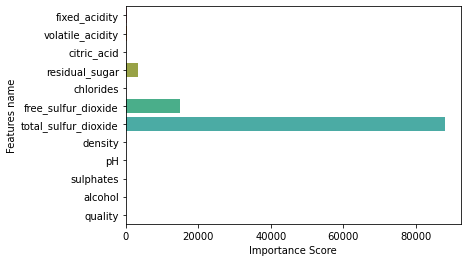

In [216]:
test = SelectKBest(score_func=chi2, k=len(X_col.columns)).fit(X_col,y)
np.set_printoptions(precision=3)
score  =  test.scores_
sns.barplot(x  = score,y = X_col.columns )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [217]:
dc = {'Chi2 ranking': X_col.columns[score.argsort()[::-1]]}
ranking = pd.DataFrame(data =  dc)
ranking

,Chi2 ranking
0,total_sulfur_dioxide
1,free_sulfur_dioxide
2,residual_sugar
3,fixed_acidity
4,volatile_acidity
5,sulphates
6,chlorides
7,citric_acid
8,quality
9,pH


In [218]:
ranking.to_excel("Wine_dataset.xlsx",sheet_name='Chi_2')  

ANOVA using SVM

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

anova_filter = SelectKBest(f_classif, k=len(X.columns))
clf = LinearSVC()
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('selectkbest', SelectKBest(k=12)), ('linearsvc', LinearSVC())])

In [ ]:
from sklearn.metrics import classification_report

y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       311
           1       1.00      0.96      0.98       989

    accuracy                           0.96      1300
   macro avg       0.94      0.97      0.95      1300
weighted avg       0.97      0.96      0.97      1300



In [ ]:
ranks = anova_svm[-1].coef_.reshape(-1)

Text(0, 0.5, 'Features name')

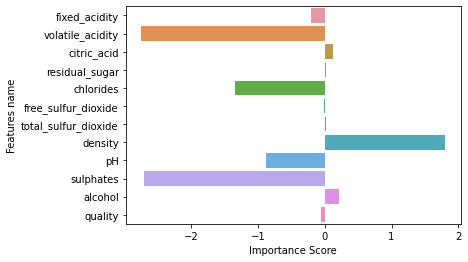

In [ ]:
sns.barplot(x  = ranks,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

ANOVA using Logistic Regression

In [ ]:
anova_filter = SelectKBest(f_classif, k=len(X.columns))
linear_clasifier =  LogisticRegression()
anova_lr = make_pipeline(anova_filter, linear_clasifier)
anova_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('selectkbest', SelectKBest(k=12)),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred = anova_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       311
           1       0.99      0.99      0.99       989

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.97      1300
weighted avg       0.98      0.98      0.98      1300



In [ ]:
ranks = anova_lr[-1].coef_.reshape(-1)

Text(0, 0.5, 'Features name')

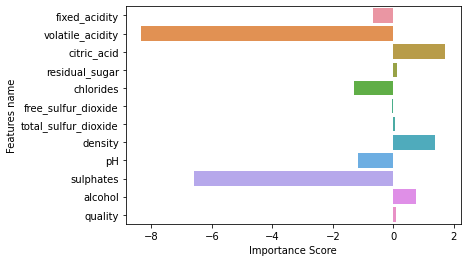

In [ ]:
sns.barplot(x  = ranks,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

Tree based models

In [219]:
from sklearn.ensemble import RandomForestRegressor

In [220]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [221]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [222]:
score = rf.feature_importances_

Text(0.5, 0, 'Feature Importance')

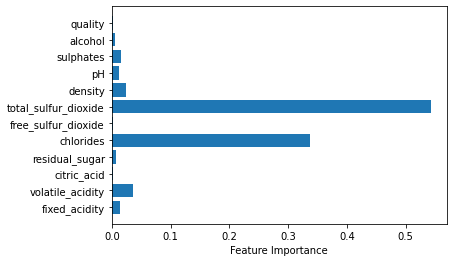

In [223]:
sort = rf.feature_importances_
plt.barh(X_col.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [224]:
dc = {'Tree based method Attributes': X_col.columns[rf.feature_importances_.argsort()[::-1]] }
rank_tree = pd.DataFrame(data =  dc) 
rank_tree

,Tree based method Attributes
0,total_sulfur_dioxide
1,chlorides
2,volatile_acidity
3,density
4,sulphates
5,fixed_acidity
6,pH
7,residual_sugar
8,alcohol
9,citric_acid


In [225]:
from openpyxl import load_workbook

book = load_workbook('/content/Wine_dataset.xlsx')
writer = pd.ExcelWriter('/content/Wine_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

rank_tree.to_excel(writer, "Tree_based_method")

writer.save()

Feature importance using permutation importance of SCikit learn this method can be used in any model.

In [226]:
from sklearn.inspection import permutation_importance

In [227]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

In [228]:
result = permutation_importance(clf, X_col, y, n_repeats=10, random_state=0)

Text(0.5, 0, 'Feature Importance MEAN')

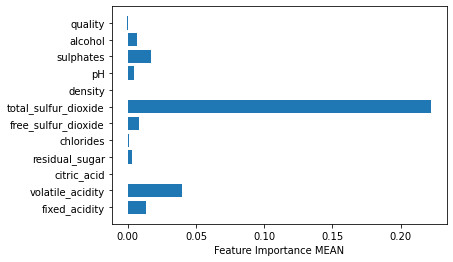

In [229]:
plt.barh(X_col.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

In [230]:
dc = {'Permutation_importance_mean': X_col.columns[result.importances_mean.argsort()[::-1]]}
rank_per_mean = pd.DataFrame(data =  dc) 
rank_per_mean

,Permutation_importance_mean
0,total_sulfur_dioxide
1,volatile_acidity
2,sulphates
3,fixed_acidity
4,free_sulfur_dioxide
5,alcohol
6,pH
7,residual_sugar
8,chlorides
9,density


In [231]:
book = load_workbook('/content/Wine_dataset.xlsx')
writer = pd.ExcelWriter('/content/Wine_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

rank_per_mean.to_excel(writer, "permutation_method_mean")

writer.save()

In [232]:
dc = {'Permutation_importance_std': X_col.columns[result.importances_std.argsort()[::-1]]}
rank_per_std = pd.DataFrame(data =  dc) 
rank_per_std

,Permutation_importance_std
0,total_sulfur_dioxide
1,volatile_acidity
2,sulphates
3,fixed_acidity
4,residual_sugar
5,free_sulfur_dioxide
6,alcohol
7,pH
8,quality
9,chlorides


Text(0.5, 0, 'Feature Importance STD')

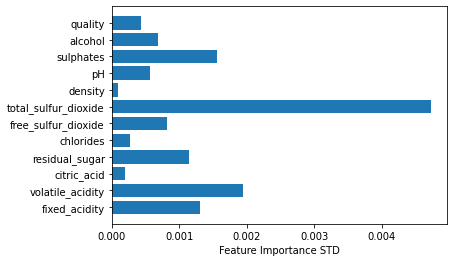

In [233]:
plt.barh(X_col.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

In [234]:
book = load_workbook('/content/Wine_dataset.xlsx')
writer = pd.ExcelWriter('/content/Wine_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_per_std.to_excel(writer, "permutation_method_std")
writer.save()

Feature importane using PCA 

In [235]:
from sklearn.decomposition import PCA

In [236]:
Scaler =  StandardScaler()
df_scaled =  Scaler.fit_transform(X_col)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=0)

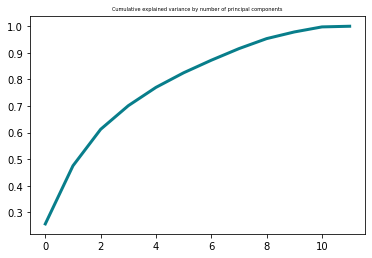

In [238]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [239]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_col.columns) + 1)],
    index=X_col.columns
)
loadings.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
fixed_acidity,-0.429527,0.441015,0.586923,-0.153369,-0.160715,0.024520,-0.294142,-0.093663,-0.274585,0.142065,-0.137490,0.057350
volatile_acidity,-0.688445,0.185438,-0.371258,-0.080136,-0.111260,0.357786,-0.279865,-0.216677,0.139998,-0.262745,0.071007,0.013776
citric_acid,0.270564,0.236857,0.749245,0.049137,0.210859,-0.277070,-0.029498,-0.303762,0.213628,-0.176580,0.111122,-0.000028
residual_sugar,0.563251,0.515761,-0.103204,0.106863,-0.451469,0.050947,0.087243,-0.003404,0.345961,0.128966,-0.006180,0.074714
chlorides,-0.525155,0.468333,0.051824,0.181789,0.381217,0.301027,0.416277,-0.200731,0.048081,0.118642,-0.095607,0.007269
free_sulfur_dioxide,0.755676,0.160354,-0.134638,0.325074,0.218626,0.256722,-0.238393,-0.141360,-0.185980,0.168130,0.225518,0.000384
total_sulfur_dioxide,0.840641,0.209609,-0.135296,0.144394,0.195797,0.095126,-0.163590,-0.007375,0.000253,-0.177385,-0.338505,-0.010592
density,-0.133581,0.882236,-0.071691,0.144069,-0.309421,-0.115581,-0.015747,-0.055669,-0.039657,0.041358,-0.003562,-0.123765
pH,-0.372028,-0.253614,-0.516500,0.473947,-0.013908,-0.436302,-0.064667,-0.305168,-0.054062,0.054221,-0.069541,0.034990
sulphates,-0.516800,0.215198,0.230392,0.620487,0.149952,-0.008577,-0.177008,0.436910,0.130198,-0.036183,0.024788,0.013274


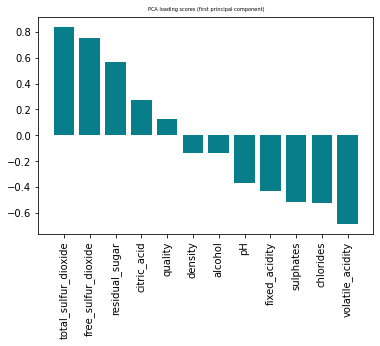

In [240]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [241]:
rank_pca = pd.DataFrame(loadings['PC1'])
rank_pca =  rank_pca.sort_values(by='PC1', ascending = False)
rank_pca

,PC1
total_sulfur_dioxide,0.840641
free_sulfur_dioxide,0.755676
residual_sugar,0.563251
citric_acid,0.270564
quality,0.127778
density,-0.133581
alcohol,-0.136157
pH,-0.372028
fixed_acidity,-0.429527
sulphates,-0.516800


In [242]:
book = load_workbook('/content/Wine_dataset.xlsx')
writer = pd.ExcelWriter('/content/Wine_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_pca.to_excel(writer, "PCA")
writer.save()

F score method

In [243]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X_col.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X_col.columns)]
fs_indices_fscore

array([ 6,  1,  4,  0,  9,  5,  7,  3,  8,  2, 11, 10])

In [244]:
best_features_fscore = df.columns[fs_indices_fscore].values
best_features_fscore

array(['total_sulfur_dioxide', 'volatile_acidity', 'chlorides',
       'fixed_acidity', 'sulphates', 'free_sulfur_dioxide', 'density',
       'residual_sugar', 'pH', 'citric_acid', 'quality', 'alcohol'],
      dtype=object)

In [127]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([5.044e+03, 3.869e+03, 1.788e+03, 1.650e+03, 1.583e+03, 1.505e+03,
       9.794e+02, 7.273e+02, 6.205e+02, 1.932e+02, 6.948e+01, 3.352e+00])

Text(0, 0.5, 'Features')

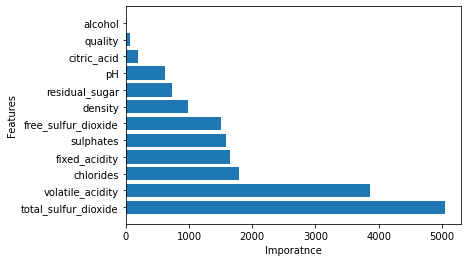

In [245]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [246]:
rank_f_test = pd.DataFrame(best_features_fscore, columns = ['F_test_rank']) 
rank_f_test

,F_test_rank
0,total_sulfur_dioxide
1,volatile_acidity
2,chlorides
3,fixed_acidity
4,sulphates
5,free_sulfur_dioxide
6,density
7,residual_sugar
8,pH
9,citric_acid


In [247]:
book = load_workbook('/content/Wine_dataset.xlsx')
writer = pd.ExcelWriter('/content/Wine_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_f_test.to_excel(writer, "F_test")
writer.save()

Mutual Information (Entropy based method)

In [248]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X_col.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X_col.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['chlorides', 'total_sulfur_dioxide', 'volatile_acidity',
       'residual_sugar', 'free_sulfur_dioxide', 'density', 'sulphates',
       'fixed_acidity', 'citric_acid', 'pH', 'alcohol', 'quality'],
      dtype=object)

In [249]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.355, 0.353, 0.237, 0.205, 0.167, 0.154, 0.154, 0.12 , 0.094,
       0.066, 0.017, 0.017])

Text(0, 0.5, 'Features')

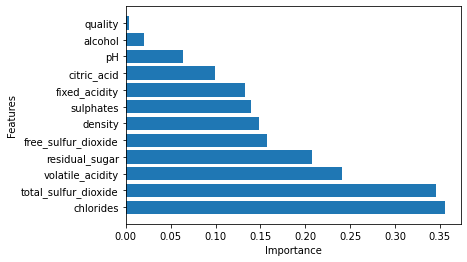

In [171]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [250]:
rank_mutual = pd.DataFrame(best_features_mutual_info,columns = ['Mutual_Info_rank'])
rank_mutual

,Mutual_Info_rank
0,chlorides
1,total_sulfur_dioxide
2,volatile_acidity
3,residual_sugar
4,free_sulfur_dioxide
5,density
6,sulphates
7,fixed_acidity
8,citric_acid
9,pH


In [251]:
book = load_workbook('/content/Wine_dataset.xlsx')
writer = pd.ExcelWriter('/content/Wine_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_mutual.to_excel(writer, "mutual_info")
writer.save()

Pearson Correlation

In [252]:
df['style'] = LabelEncoder().fit_transform(df['style'])
df_corr = df.corr()

In [253]:
corr_rank = pd.DataFrame(df_corr['style'])
corr_rank = corr_rank.sort_values(by = 'style',ascending = False)
corr_rank

,style
style,1.000000
total_sulfur_dioxide,0.700357
free_sulfur_dioxide,0.471644
residual_sugar,0.348821
citric_acid,0.187397
quality,0.119323
alcohol,0.032970
pH,-0.329129
density,-0.390645
fixed_acidity,-0.486740


In [254]:
book = load_workbook('/content/Wine_dataset.xlsx')
writer = pd.ExcelWriter('/content/Wine_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
corr_rank.to_excel(writer, "Pearson_Correlation")
writer.save()

Recursive Feature Elimination

In [255]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

In [256]:
estimator = LinearSVC()

In [ ]:
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)

In [267]:
X_col.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [269]:
index = selector.ranking_.argsort()
index

array([ 7,  3, 10,  6,  1,  5,  4,  0,  8, 11,  2,  9])

In [270]:
X_col.columns[index]

Index(['density', 'residual_sugar', 'alcohol', 'total_sulfur_dioxide',
       'volatile_acidity', 'free_sulfur_dioxide', 'chlorides', 'fixed_acidity',
       'pH', 'quality', 'citric_acid', 'sulphates'],
      dtype='object')

In [274]:
dc = {'Rank_RFE': X_col.columns[index]}
rank_RFE = pd.DataFrame(data =  dc) 
rank_RFE

,Rank_RFE
0,density
1,residual_sugar
2,alcohol
3,total_sulfur_dioxide
4,volatile_acidity
5,free_sulfur_dioxide
6,chlorides
7,fixed_acidity
8,pH
9,quality


In [275]:
book = load_workbook('/content/Wine_dataset.xlsx')
writer = pd.ExcelWriter('/content/Wine_dataset.xlsx', engine='openpyxl') 
writer.book = book

## ExcelWriter for some reason uses writer.sheets to access the sheet.
## If you leave it empty it will not know that sheet Main is already there
## and will create a new sheet.

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
rank_RFE.to_excel(writer, "RFE")
writer.save()